# Essentials


In [1]:
# Assesting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Implemented modules
from preprocessing import preprocess_df
from FE import Vocabulary
from models import MNB
from utils import get_accuracy
from utils import analyze_result
from utils import plot_cunfusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Files
SPAM_HAM_FILE = '/content/drive/MyDrive/MI_NLP_Exercise/datasets/spam_ham_dataset.csv'
SPAM_ASSASIN_FILE = '/content/drive/MyDrive/MI_NLP_Exercise/datasets/completeSpamAssassin.csv'
SPAM_LING_FILE = '/content/drive/MyDrive/MI_NLP_Exercise/datasets/lingSpam.csv'
SPAM_ENRON_FILE = '/content/drive/MyDrive/MI_NLP_Exercise/datasets/enronSpamSubset.csv'

#Constants
MAX_VOCAB_SIZE = 50000
EMBEDDING_DIM = 5000
DELTA = 1e-12
BETA = 1e-6
GAMMA = 1e-3

# Dataset Importing

In [3]:
ham_df = pd.read_csv(SPAM_HAM_FILE).drop(['Unnamed: 0','label'],axis=1).rename(columns={'text':'Body','label_num':'Spam'})
assasin_df = pd.read_csv(SPAM_ASSASIN_FILE).drop(['Unnamed: 0'],axis=1).rename(columns={'Label':'Spam'})
ling_df = pd.read_csv(SPAM_LING_FILE).drop(['Unnamed: 0'],axis=1).rename(columns={'Label':'Spam'})
enron_df = pd.read_csv(SPAM_ENRON_FILE).drop(['Unnamed: 0','Unnamed: 0.1'],axis=1).rename(columns={'Label':'Spam'})
ham_df

,Body,Spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


# Preprocessing

In [4]:
df = preprocess_df(assasin_df,'Body','Spam')
df

,Body,Spam
0,"[save, 70, life, insur, spend, life, quot, sav...",1
1,"[1, fight, risk, cancer, slim, guarante, lose,...",1
2,"[1, fight, risk, cancer, slim, guarante, lose,...",1
3,"[adult, club, offer, free, membership, instant...",1
4,"[thought, might, like, 1, slim, guarante, lose...",1
...,...,...
6033,"[1, isilo, tm, 3, 25, palm, os, pocket, pc, wi...",0
6034,"[effector, vol, 15, 35, novemb, 8, 2002, ren, ...",0
6039,"[extend, free, seat, sale, thursday, 21st, nov...",0
6042,"[one, ten, 27, 11, 02, insignific, matter, hea...",0


In [5]:
df['mail_length'] = df['Body'].apply(lambda x: len(x))
df

,Body,Spam,mail_length
0,"[save, 70, life, insur, spend, life, quot, sav...",1,97
1,"[1, fight, risk, cancer, slim, guarante, lose,...",1,56
2,"[1, fight, risk, cancer, slim, guarante, lose,...",1,41
3,"[adult, club, offer, free, membership, instant...",1,221
4,"[thought, might, like, 1, slim, guarante, lose...",1,49
...,...,...,...
6033,"[1, isilo, tm, 3, 25, palm, os, pocket, pc, wi...",0,930
6034,"[effector, vol, 15, 35, novemb, 8, 2002, ren, ...",0,894
6039,"[extend, free, seat, sale, thursday, 21st, nov...",0,291
6042,"[one, ten, 27, 11, 02, insignific, matter, hea...",0,1384


# Analysis

In [6]:
df.mail_length.describe()

count    5294.000000
mean      172.997167
std       390.111618
min         0.000000
25%        47.000000
50%        88.000000
75%       157.000000
max      8527.000000
Name: mail_length, dtype: float64

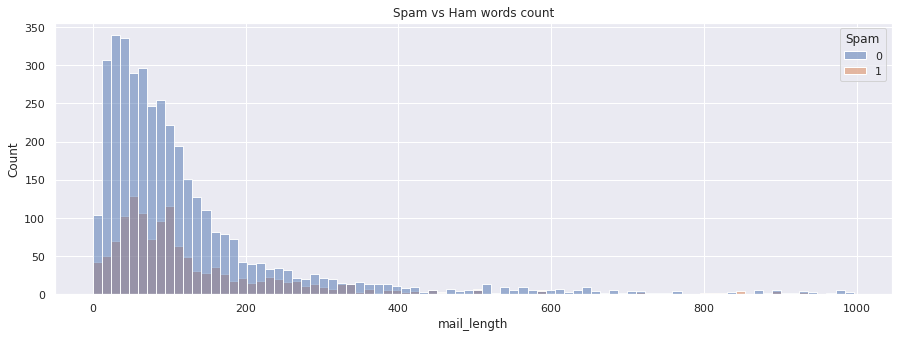

In [7]:
_ = plt.figure(figsize=(15,5))
_ = sns.histplot(data=df[df['mail_length'] < 1000],x='mail_length',hue='Spam')
_ = plt.title('Spam vs Ham words count')

<Figure size 1080x360 with 0 Axes>

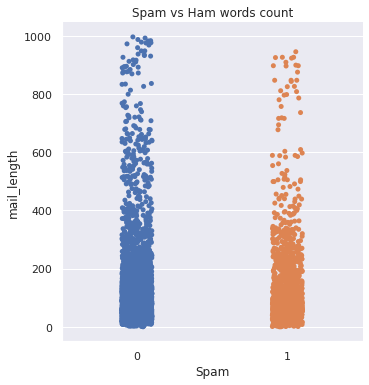

In [8]:
_ = plt.figure(figsize=(15,5))
_ = sns.catplot(x="Spam", y="mail_length", data=df[df['mail_length'] < 1000])
_ = plt.title('Spam vs Ham words count')

# Feature Extraction

In [9]:
# Get BOW matrix for data
my_vocab = Vocabulary(MAX_VOCAB_SIZE)
my_vocab.create_bag_of_words_matrix(df)

bow_matrix = pd.DataFrame(np.zeros((len(df),len(my_vocab.unique_words))),columns=list(my_vocab.unique_words.keys()))
for index,sentence in enumerate(df['Body']):
  cols,values = my_vocab.get_row(index)
  bow_matrix.iloc[index][cols] = values

# Modelling IMPLEMENTED

In [10]:
X_train, X_test, y_train, y_test = train_test_split(bow_matrix.values, df['Spam'].values, test_size=0.2, random_state=421)

In [11]:
clf = MNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Result Analysis

In [12]:
analyze_result(y_pred,y_test)

Accuary: 98.21%
Precision: 98.80%
Recall: 93.92%
F1 Score: 96.30%


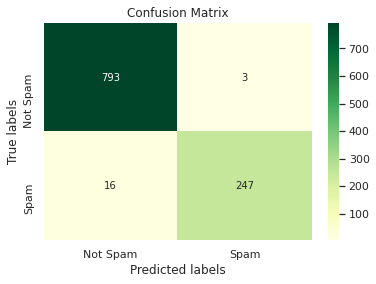

In [13]:
plot_cunfusion_matrix(y_pred,y_test)

# Non-implemented models (for embedding and tfidf)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=EMBEDDING_DIM, svd_solver='full')
X_seq = pca.fit_transform(my_vocab.tfidf_matrix, y=None)
X_seq.shape

In [ ]:
np.mean(my_vocab.tfidf_matrix,axis=0)

array([0.00037779, 0.00075557, 0.00468984, ..., 0.00207782, 0.00037779,
       0.00037779])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train,y_train)
np.sum(clf.predict(X_test) == y_test) / len(y_test)

0.9641170915958451

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
np.sum(clf.predict(X_test) == y_test) / len(y_test)

0.816933638443936

In [ ]:
from sklearn.svm import SVC
clf = SVC(C=5.0,probability=True)
clf.fit(X_train,y_train)
np.sum(clf.predict(X_test) == y_test) / len(y_test)

0.9628146453089245

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
np.sum(clf.predict(X_test) == y_test) / len(y_test)

0.9726156751652503

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
np.sum(clf.predict(X_test) == y_test) / len(y_test)

0.7714825306893296

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=EMBEDDING_DIM, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=30, batch_size=127,validation_data=(X_test,y_test))

In [ ]:
y_predict = clf.predict(X_test)

# SUB-IMPLEMENTED (NOT COMPLETE)



In [ ]:
def prepare_data(df,X,length_col,vocab):
  # (1) Encoding words
  df[X] = df[X].apply(lambda sentence: [vocab[word] for word in sentence])

  # (2) Padding/Truncating rows
  length_stats = df[length_col].describe()
  common_length = length_stats.loc['75%']
  max_length = length_stats.loc['max']
  picked_length = int( max_length if common_length / max_length >= 0.5 else common_length)

  df[X] = df[X].apply(lambda sentence: sentence + [0]*(picked_length-len(sentence)) if len(sentence) < common_length else sentence[:picked_length])

**LSTM:** Long Short-Term Memory


*   Learns when to remember and when to forget
*   Anatomy:

  -  A cell state
  -  A hidden state with three gates: Forget, input and output
  -  Loops back again at the end of each time step after
updating the states.





*   Forget gate: Decides what to keep.
*   Input gate: Decides what to add.
*   Output gate: Decides what the next hidden state


In [ ]:
def lstm_weight_init(shape):
  """
    Sources 
    ----------
      https://arxiv.org/abs/1312.6120
    Description
    -----------
      Initialze LSTM wights

    Parameters
    ----------
    Returns
    -------
    """
  if W.ndim != 2:
    raise ValueError("Initialaiztion is only allowed for ndim=2")

  Wo = np.random.randn(shape[0],shape[1])
  Wo = Wo if shape[0] >= shape[1] else Wo.T

  q,r = np.linalg.qr(Wo)
  q *= np.sign(np.diag(r,0))
  Wo = q if shape[0] >= shape[1] else q.T

  return Wo

In [ ]:
def nn_weight_init(shape):
  
  if W.ndim != 2:
    raise ValueError("Initialaiztion is only allowed for ndim=2")
  
  Wo = np.random.randn(shape[0], shape[1]) / np.sqrt(shape[1])

  return Wo

In [ ]:
def segmoid(X):
  return 1/(1+np.exp(-X))

def segmoid_(X):
  Z = segmoid(X)
  return Z * (1-Z) 

def tanh(X):
  return (np.exp(X+DELTA)-np.exp(-(X+DELTA)))/(np.exp((X+DELTA))+np.exp(-(X+DELTA)))

def tanh_(X):
  return 1-np.power(tanh(X),2)

def softmax(X):
  e_X = np.exp(X)
  e_X_total = np.sum(e_X,axis=1).reshape(-1,1)
  return e_X / e_X_total

def softmax_(X):
  return X # No need for softmax derivative

def relu(X):
  return np.maximum(X,0)

def relu_(X):
  return (X > 0).astype(int)

def cross_entropy(y_,y):
  return -np.mean(np.log(y_) * y)

def binray_cross_enrtopy(y_,y):
  return -1*(y * np.log(y_) + (1-y) np.log(1-y_))

def binray_cross_enrtopy_(y_,y):
  return (y_ - y) / (y_ * (1-y_))

In [ ]:
class LSTM:

  def __init__(self,units,input_size,initializer=lstm_weight_init):
    """
    Description
    -----------
      Initialze LSTM parameters

    Parameters
    ----------
      units: int 
        Size of hidden-state

      vocab_size: int
        Size of corpus vocab

      input_size: int
        Size of input vector
    """
    # Storing size
    self.units = units
    self.input_size = input_size

    # Forget paramaters
    self.Wf = initializer((units,input_size+units))
    self.bf = np.zeros((units,1))

    # Input paramaters
    self.Wi = initializer((units,input_size+units))
    self.bi = np.zeros((units,1))

    # Candidate paramaters
    self.Wg = initializer((units,input_size+units))
    self.bg = np.zeros((units,1))

    # Output paramaters
    self.Wo = initializer((units,input_size+units))
    self.bo = np.zeros((units,1))

    # Predection paramaters
    self.Wp = initializer((input_size,units))
    self.bp = np.zeros((input_size,1))

    

    # Computations storage
    self.z,self.f,self.i, ,self.p,self.g,self.o,self.h,self.c,self.p   = [],[],[],[],[],[],[],[],[]
    self.Wf_d,self.Wi_d,self.Wg_d,self.Wo_d,self.Wp_d = np.zeros_like(Wf),np.zeros_like(Wi),np.zeros_like(Wg),np.zeros_like(Wo),np.zeros_like(Wp)
    self.bf_d,self.bi_d,self.bg_d,self.bo_d,self.bp_d = np.zeros_like(bf),np.zeros_like(bi),np.zeros_like(bg),np.zeros_like(bo),np.zeros_like(bp)
   
    # Losses
    self.loss = cross_entropy
    self.train_loss, self.val_loss = [],[]
    
  def clip_grad_norm(self,max_norm=0.25):

    max_norm = float(max_norm) if type(max_norm) != type(0.25) else max_norm #Casting to float
    total_norm = 0

    for grad in [self.Wf_d,self.Wi_d,self.Wg_d,self.Wo_d,self.Wp_d,self.bf_d,self.bi_d,self.bg_d,self.bo_d,self.bp_d]:
      total_norm += np.sum(np.power(grad,2))
    
    total_norm = np.sqrt(total_norm)

    cc = max_norm / (total_norm + BETA)
    if cc < 1:
      self.Wf_d,self.Wi_d,self.Wg_d,self.Wo_d,self.Wp_d,self.bf_d,self.bi_d,self.bg_d,self.bo_d,self.bp_d = self.Wf_d + cc,self.Wi_d + cc,self.Wg_d + cc,self.Wo_d + cc,self.Wp_d + cc,self.bf_d + cc,self.bi_d + cc,self.bg_d + cc,self.bo_d + cc,self.bp_d + cc


  def update(self,alpha):
    self.Wf,self.Wi,self.Wg,self.Wo,self.Wp =  Wf - alpha * self.Wf_d, Wi - alpha * self.Wi_d, Wg - alpha * self.Wg_d, Wo - alpha * self.Wo_d, Wp - alpha * self.Wp_d
    self.bf,self.bi,self.bg,self.bo,self.bp =  bf - alpha * self.bf_d, bi - alpha * self.bi_d, bg - alpha * self.bg_d, bo - alpha * self.bo_d, bp - alpha * self.bp_d

  def forward_pass(x,h_init,c_init):
    
    self.z,self.f,self.i,self.o,self.g,self.c,self.h,self.p = [],[],[],[],[],[],[],[]


    self.h.append(h_init)
    self.c.append(c_init)

    h_i = h_init
    c_i = c_init

    for row in x:

      # Input & hindden state concatenating 
      z_i = np.row_stack((h_i,row))
      self.z.append(z_i)

      # Forget gate 
      f_i = segmoid(np.dot(self.Wf,z_i)+self.bf)
      self.f.append(f_i)

      # Input gate
      i_i = segmoid(np.dot(self.Wi,z_i)+self.bi)
      self.i.append(i_i)

      # Output gate 
      o_i = segmoid(np.dot(self.Wo,z_i)+self.bo)
      self.o.append(o_i)

      # Candidate
      g_i = tanh(np.dot(self.Wg,z_i) + self.bg)
      self.g.append(g_i)

      # Memory state
      c_i = c_i * f_i + g_i * o_i
      self.c.append(c_i)

      # Hidden state
      h_i = o_i * tanh(c_i)
      self.h.append(h_i)

      # Prediction
      p_i = softmax(np.dot(Wp,h_i) + bp)
      self.p.append(p_i)


  def backward_pass(self,y):

    # Forget paramaters
    self.Wf_d = np.zeros_like(self.Wf)
    self.bf_d = np.zeros_like(self.bf)

    # Input paramaters
    self.Wi_d = np.zeros_like(self.Wi)
    self.bi_d = np.zeros_like(self.bi)

    # Candidate paramaters
    self.Wg_d = np.zeros_like(self.Wg)
    self.bg_d = np.zeros_like(self.bg)

    # Output paramaters
    self.Wo_d = np.zeros_like(self.Wo)
    self.bo_d = np.zeros_like(self.bo)

    # Predection paramaters
    self.Wp_d = np.zeros_like(self.Wp)
    self.bp_d = np.zeros_like(self.bp)

    # Hidden and cell state
    h_init_d = np.zeros_like(self.h[0])
    c_init_d = np.zeros_like(self.c[0])

    #Loss function init
    J = 0

    for t in reversed(range(len(self.p))):

      # Get current Loss
      J += self.loss(self.p[t] * y[t])

      # Output & hidden grads,weights and derivatives
      dp = self.p[t][np.argmax(y[t])] - 1

      self.Wp_d += np.dot(dp,self.h[t].T)
      self.bp_d += dp

      h_d = np.dot(Wp.T,dp) + h_init_d
      o_d = segmoid_(self.o[t]) * h_d * tanh(self.c[t])

      self.Wo_d += np.dot(o_d,self.z[t].T)
      self.bo_d += o_d

      # Cell state & candidate grads,weights and derivatives
      c_d =  c_init_d + (h_d * self.o[t] * tanh_(tanh(self.c[t])))
      g_d =  tanh_(self.g[t]) * c_d * self.i[t] 

      self.Wg_d += np.dot(g_d, self.z[t].T)
      self.bg_d += g_d

      # Input gate grads,weights and derivatives
      i_d =  segmoid_(self.i[t]) * c_d * self.g[t]

      self.Wi_d += np.dot(i_d, self.z[t].T)
      self.bi_d += i_d

      # Forget grads,weights and derivatives
      f_d = segmoid(self.f[t]) * c_d * self.c[t-1] 
      
      self.Wf_d += np.dot(f_d,self.z[t].T)
      self.bf_d += f_d

      # To solve exploding gradients problem
      self.clip_grad_norm()

      # Update weights
      self.update(alpha=1e-1)

    return J


  def backward_pass_mid(self,dz_next,W_next):

    # Forget paramaters
    self.Wf_d = np.zeros_like(self.Wf)
    self.bf_d = np.zeros_like(self.bf)

    # Input paramaters
    self.Wi_d = np.zeros_like(self.Wi)
    self.bi_d = np.zeros_like(self.bi)

    # Candidate paramaters
    self.Wg_d = np.zeros_like(self.Wg)
    self.bg_d = np.zeros_like(self.bg)

    # Output paramaters
    self.Wo_d = np.zeros_like(self.Wo)
    self.bo_d = np.zeros_like(self.bo)

    # Predection paramaters
    self.Wp_d = np.zeros_like(self.Wp)
    self.bp_d = np.zeros_like(self.bp)

    # Hidden and cell state
    h_init_d = np.zeros_like(self.h[0])
    c_init_d = np.zeros_like(self.c[0])

    for t in reversed(range(len(self.p))):

      dp = (dz_next @ W_next).T

      self.Wp_d += np.dot(dp,self.h[t].T)
      self.bp_d += dp

      h_d = np.dot(Wp.T,dp) + h_init_d
      o_d = segmoid_(self.o[t]) * h_d * tanh(self.c[t])

      self.Wo_d += np.dot(o_d,self.z[t].T)
      self.bo_d += o_d

      # Cell state & candidate grads,weights and derivatives
      c_d =  c_init_d + (h_d * self.o[t] * tanh_(tanh(self.c[t])))
      g_d =  tanh_(self.g[t]) * c_d * self.i[t] 

      self.Wg_d += np.dot(g_d, self.z[t].T)
      self.bg_d += g_d

      # Input gate grads,weights and derivatives
      i_d =  segmoid_(self.i[t]) * c_d * self.g[t]

      self.Wi_d += np.dot(i_d, self.z[t].T)
      self.bi_d += i_d

      # Forget grads,weights and derivatives
      f_d = segmoid(self.f[t]) * c_d * self.c[t-1] 
      
      self.Wf_d += np.dot(f_d,self.z[t].T)
      self.bf_d += f_d

      # To solve exploding gradients problem
      self.clip_grad_norm()

      # Update weights
      self.update(alpha=1e-1)






  def fit(self,X_train,y_train,X_val,y_val,epochs,alpha=0.001,logs=True):

    for epoch in epochs:

      # Epoch losees
      epoch_val_loss = 0
      epoch_train_loss = 0

      # Validation data
      for x,y in zip(X_val,y_val):
        
        h_init = np.zeros((self.units, 1))
        c_init = np.zeros((self.units, 1))

        self.forward_pass(x,h_init,c_init)
        epoch_val_loss += self.backward_pass(y)

      # Training data
      for x,y in zip(X_train,y_train):

        h_init = np.zeros((self.units, 1))
        c_init = np.zeros((self.units, 1))

        self.forward_pass(x,h_init,c_init)
        epoch_train_loss += self.backward_pass(y)

        

      self.val_loss.append(epoch_val_loss/len(X_val))
      self.train_loss.append(epoch_train_loss/len(X_train))
      
      if logs:
        print(f'Epoch {epoch}/{epochs}: loss: {self.train_loss[-1]},  val_loss: {self.train_loss[-1]}')



In [ ]:
class Dense:
  
  def __init__(self,units,input_size,m,activation='relu',initializer=nn_weight_init):

    # Storing size
    self.units = units
    self.input_size = input_size
    self.m = m

    # Weight initialize
    self.W = initializer(units,input_size)
    self.b = np.zeros((units,1))

    # Grads initialize
    self.DW = 0
    self.Db = 0

    # Activation function
    self.activation = relu
    self.activation_ = relu_

    # Loss function
    self.loss = lambda x: x
    self.loss_ = lambda x: x
    # Calculating store
    self.a = []
    self.dz_mem = []


  def update(self,alpha):
    self.W -= alpha * self.DW
    self.b -= alpha * self.db

  def forward_pass(x):

    for ao in x:

      Z = W @ ao + b
      a1 = self.activation(Z)
      self.a.append(a1)
  
  def backward_pass(self,a_prev,y):

    J = 0
    for i in range(self.m):
      
      J += self.loss(self.a[i],y[i])

      da = self.loss_(self.a[i])
      dz = da * self.activation_(self.a[i])
      self.dz_mem.append(dz)
      dW = dz @ a_prev[i].T
      db = dz

      self.DW += dw
      self.Db += db 

    
    self.DW /= len(self.a)
    self.Db /= len(self.a)
    J /= len(self.a)

    return J

  def backward_pass_mid(self,a_prev,dz_next,W_next):

    for i in range(self.m):

      da = (dz_next[i] @ W_next).T
      dz = da * self.activation_(self.a[i])
      self.dz_mem.append(dz)
      dW = dz @ a_prev.T
      db = dz

      self.DW += dw
      self.Db += db 
    
    self.DW /= len(self.a)
    self.Db /= len(self.a)

      

In [ ]:
model = tf.keras.Sequential()

model.add(Embedding(name="synopsis_embedd",input_dim =len(my_vocab), 
                       output_dim=EMBEDDING_DIM,weights=[my_vocab.embedding_matrix], 
                       input_length=X_seq.shape[1],trainable=False))

#model.add(Bidirectional(tf.keras.layers.LSTM(64)))

#model.add(Dense(16, activation='relu'))

#model.add(Dropout(0.1))

#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
synopsis_embedd (Embedding)  (None, 157, 100)          4706200   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               84480     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 4,792,761
Trainable params: 86,561
Non-trainable params: 4,706,200
_________________________________________________________________


In [ ]:
model = tf.keras.Sequential()

model.add(Embedding(name="synopsis_embedd",input_dim =len(my_vocab), 
                       output_dim=EMBEDDING_DIM,weights=[my_vocab.embedding_matrix], 
                       input_length=X_seq.shape[1],trainable=False))

model.compile('rmsprop', 'mse')

